In [2]:
import sys
sys.path.append('../')

import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib 

import ast

import FullRankRNN as rnn
import Reinforce as rln

In [3]:
clsf_on_actor = False

if clsf_on_actor:
    with open("relevant_neurons_actor.txt", 'r') as file:
        file_content = file.read()
else:
    with open("relevant_neurons_critic.txt", 'r') as file:
        file_content = file.read()

parsed_content = ast.literal_eval(file_content)

relevant_neurons = np.asarray(parsed_content)
print(relevant_neurons)

[ 80  93  78  90 100  98  24   7 116 113]


In [4]:
collection1 = new_vector = np.zeros((len(relevant_neurons), 1))
x_values = []
pair = []

for i in range(3):
    for j in (0.25, 0.5, 0.75):
        
        v1 = 1
        v2 = 1+i
        p1 = 0.25
        p2 = j
        #print(v1, v2)
        
        x_values.append(v2*p2)
        pair.append(str((v2,p2)))
        
        values_probs = np.array([v1, v2, p1, p2])
        v1s = np.array([values_probs[0]])
        v2s = np.array([values_probs[1]])
        p1s = np.array([values_probs[2]])
        p2s = np.array([values_probs[3]])

        reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network_good.pt",
                                  name_load_critic="models/RL_critic_network_good.pt",
                                  v1s=v1s, v2s=v2s, p1s=p1s, p2s=p2s)

        iterations = 100 
        observations, rewards, actions,\
        log_action_probs, entropies, values,\
        trial_begins, errors, frates, final_actions = reinforce.experience(iterations, clsf_on_actor=clsf_on_actor)

        a_frates=frates
        
        new_vector = np.zeros((len(relevant_neurons), 1))

        a_frates_rid = a_frates[relevant_neurons]
        a_frates_rid = a_frates_rid.mean(axis=1)
        new_vector[:,0] = a_frates_rid
        collection1 = np.concatenate((collection1, new_vector), axis=1)
        
collection1 = collection1[:, 1:]


iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


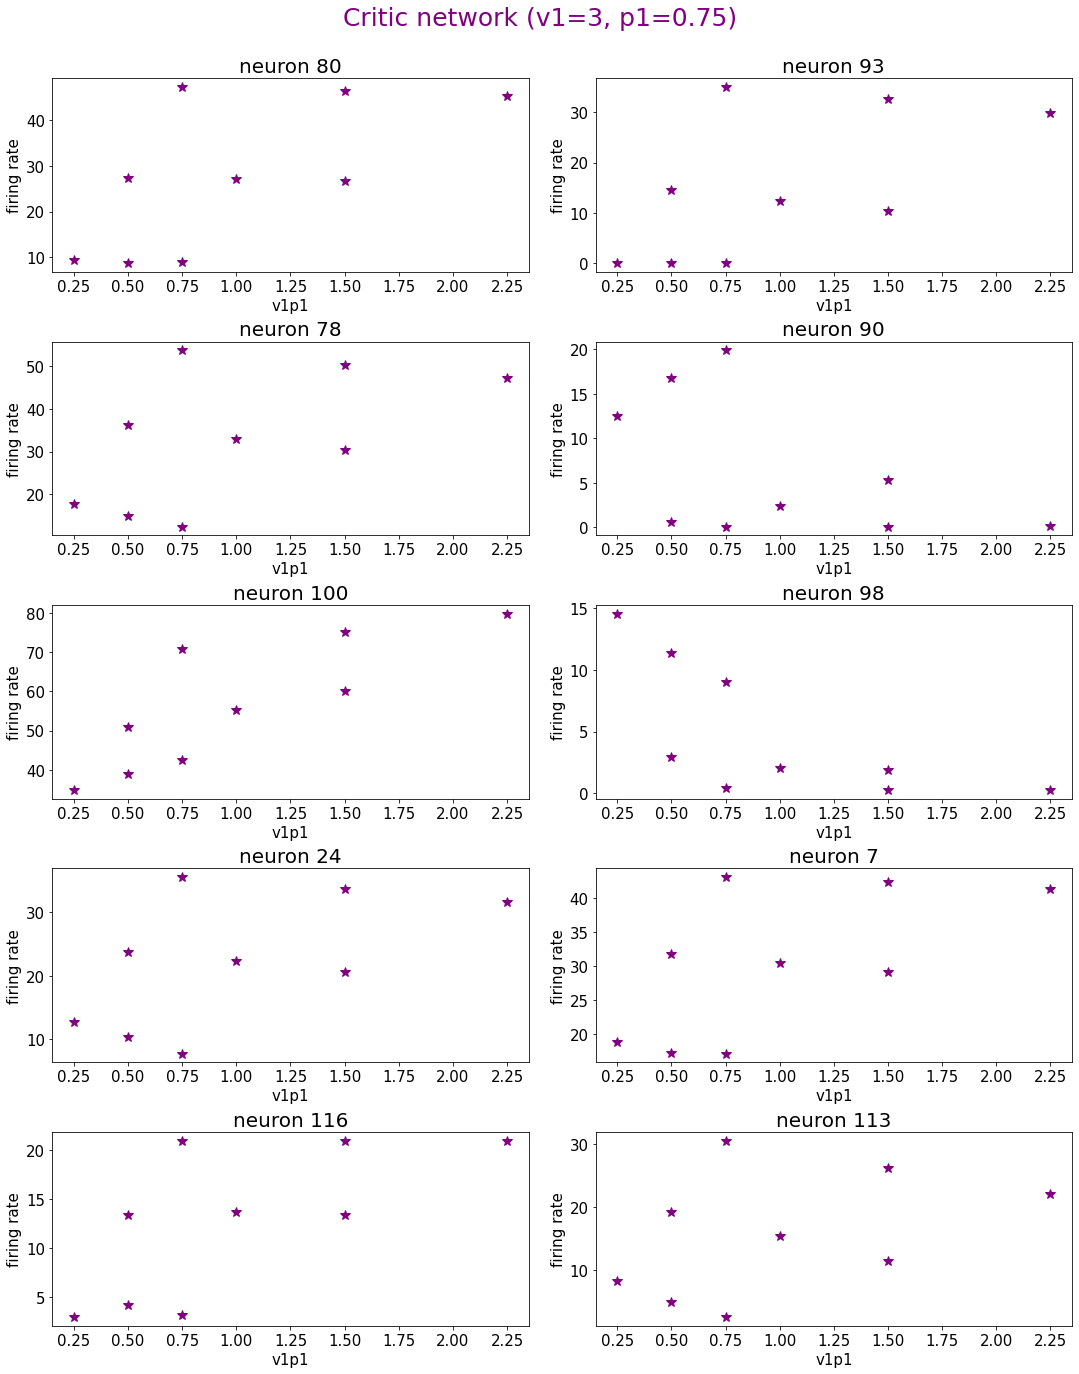

In [5]:
fig, axx = plt.subplots(5, 2, figsize=(15, 20))
axx = axx.reshape(-1)
for n, ax in enumerate(axx):
    for i in range(9):
        ax.plot(x_values[i], collection1[n, i], "*", markersize=10, color="purple")
        #ax.text(x_values[i]+0.03, collection1[n, i], pair[i], fontsize=10)
        ax.set_title("neuron %i" %(relevant_neurons[n]), size=20)
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.set_xlabel("v1p1", size=15)
        ax.set_ylabel("firing rate", size=15)
plt.tight_layout()      
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if clsf_on_actor:
    plt.suptitle("Actor network (v1=1, p1=0.25)", size=25, color="purple")
    plt.savefig('figures/actor_LEFTtarget-lowRIGTH.png')
else:
    plt.suptitle("Critic network (v1=3, p1=0.75)", size=25, color="purple")
    plt.savefig('figures/critic_LEFTtarget-lowRIGTH.png')


In [6]:
check = True
random_neurons = np.zeros(10)
while check is True:
    random_neurons = np.random.randint(0, 128, 10)
    bool_array = np.isin(random_neurons, relevant_neurons)
    check = any(bool_array)
random_neurons = np.sort(random_neurons)

In [7]:
collection4 = new_vector = np.zeros((len(relevant_neurons), 1))
x_values4 = []
pair4 = []

for i in range(3):
    for j in (0.25, 0.5, 0.75):
        
        v1 = 1
        v2 = 1+i
        p1 = 0.25
        p2 = j
        #print(v1, v2)
        
        x_values4.append(v2*p2)
        pair4.append(str((v2,p2)))
        
        values_probs = np.array([v1, v2, p1, p2])
        v1s = np.array([values_probs[0]])
        v2s = np.array([values_probs[1]])
        p1s = np.array([values_probs[2]])
        p2s = np.array([values_probs[3]])

        reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network_good.pt",
                                  name_load_critic="models/RL_critic_network_good.pt",
                                  v1s=v1s, v2s=v2s, p1s=p1s, p2s=p2s)

        iterations = 100
        observations, rewards, actions,\
        log_action_probs, entropies, values,\
        trial_begins, errors, frates, final_actions = reinforce.experience(iterations, clsf_on_actor=clsf_on_actor)
        
        a_frates=frates
        
        new_vector = np.zeros((len(relevant_neurons), 1))

        a_frates_rid = a_frates[random_neurons]
        a_frates_rid = a_frates_rid.mean(axis=1)
        new_vector[:,0] = a_frates_rid
        collection4 = np.concatenate((collection4, new_vector), axis=1)
        
collection4 = collection4[:, 1:]

iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


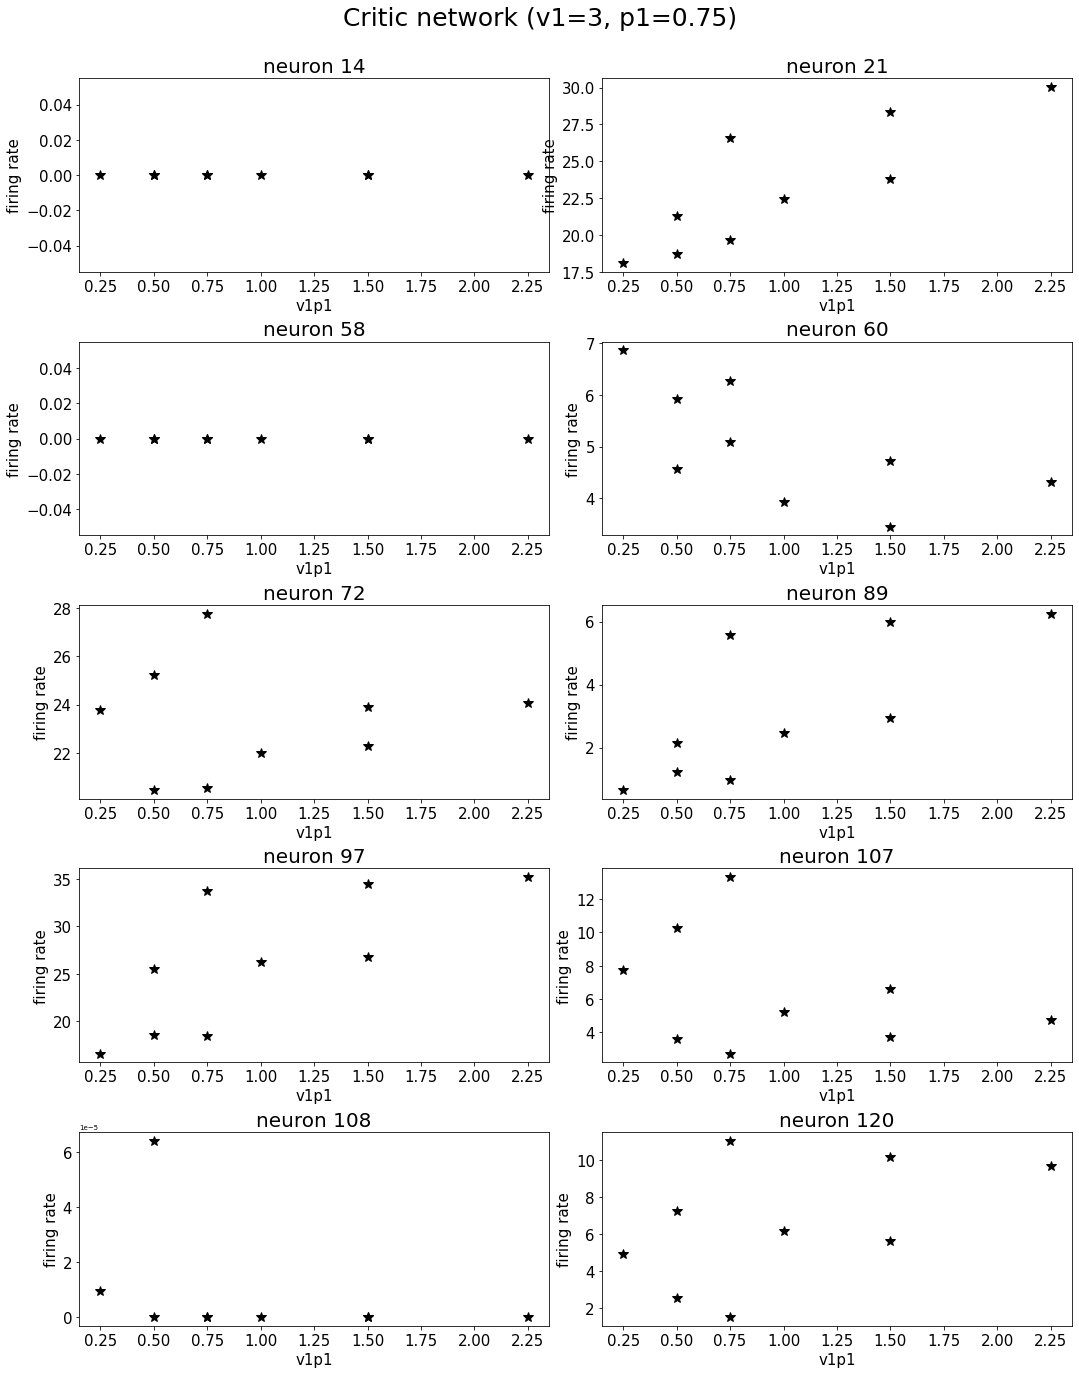

In [8]:
fig, axx = plt.subplots(5, 2, figsize=(15, 20))
axx = axx.reshape(-1)
for n, ax in enumerate(axx):
    for i in range(9):
        ax.plot(x_values4[i], collection4[n, i], "*", markersize=10, color="black")
        #ax.text(x_values4[i]+0.03, collection4[n, i], pair4[i], fontsize=10)
        ax.set_title("neuron %i" %(random_neurons[n]), size=20)
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.set_xlabel("v1p1", size=15)
        ax.set_ylabel("firing rate", size=15)
plt.tight_layout()      
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if clsf_on_actor:
    plt.suptitle("Actor network (v1=1, p1=0.25)", size=25, color="black")
    plt.savefig('figures/actor_LEFTtarget-lowRIGTH_random.png')
else:
    plt.suptitle("Critic network (v1=3, p1=0.75)", size=25, color="black")
    plt.savefig('figures/critic_LEFTtarget-lowRIGTH_random.png')